<a href="https://colab.research.google.com/github/Rosebud21/Pythonsentimentanalysis/blob/main/YouTubeComments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pull Comments

In [ ]:
import googleapiclient.discovery
import googleapiclient.errors

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = ""

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="Hki6RqI-eMA",
    maxResults=100
)
response = request.execute()

for item in response['items']:
    print(item['snippet']['topLevelComment']['snippet']['textDisplay'])


This is a Pepsi commercial, right?
Why is she giving lana?
3014 Schamberger Throughway
this song has no business being this good omfg
Diet mountain dew, nahh<br>We got Diet pepsi
2&#39;24
Addison lo estás logrando felicidades
DAMNN
Never thought an Addison Rae song would be stuck in my head.
I’m shocked.
HOLYYYYYYYMOLYYYYYYYYY DIDNT THINK THIS WOULD BE SUCH A BANGERRRRRR
Advertising coup by pepsi ? Nice song tho.
I love you, Addison. &lt;3
I FEAR SHE ATE <a href="UCkszU2WH9gy1mb0dV-11UJg/ygF1XpGUMMjk8gSDrI2wCx"></a><a href="UCkszU2WH9gy1mb0dV-11UJg/hm5IY4W-H9SO5QS6n4CwCA"></a>
Wtf did I just listen to 🙂
isso sim é rebrand de qualidade<br>se provou artista
Im glad everyone in the comments had the same reaction as me when i saw this song was by addison rae and loved it  😂
tbh song is unexpectedly good i like it, just music videw so bad it sending me off
Girl no hate but what is this music video 😒
que tesão
This had to be one of the worst songs I have ever heard
<br># boycott <a href="htt

## Output as Pandas DataFrame

In [ ]:
import googleapiclient.discovery
import pandas as pd

api_service_name = "youtube"
api_version = "v3"
DEVELOPER_KEY = ""

youtube = googleapiclient.discovery.build(
    api_service_name, api_version, developerKey=DEVELOPER_KEY)

request = youtube.commentThreads().list(
    part="snippet",
    videoId="Hki6RqI-eMA",
    maxResults=100
)
response = request.execute()

comments = []

for item in response['items']:
    comment = item['snippet']['topLevelComment']['snippet']
    comments.append([
        comment['authorDisplayName'],
        comment['publishedAt'],
        comment['updatedAt'],
        comment['likeCount'],
        comment['textDisplay']
    ])

df = pd.DataFrame(comments, columns=['author', 'published_at', 'updated_at', 'like_count', 'text'])

df.head(10)


,author,published_at,updated_at,like_count,text
0,@dmmm8371,2024-10-12T04:57:47Z,2024-10-12T04:57:47Z,0,"This is a Pepsi commercial, right?"
1,@urisseegatdula196,2024-10-12T04:36:35Z,2024-10-12T04:36:35Z,0,Why is she giving lana?
2,@CooperArmstrong-y4m,2024-10-12T03:01:23Z,2024-10-12T03:01:23Z,0,3014 Schamberger Throughway
3,@neoknight3320,2024-10-12T02:52:00Z,2024-10-12T02:52:00Z,0,this song has no business being this good omfg
4,@Perwiwinkle,2024-10-12T01:58:27Z,2024-10-12T01:58:27Z,0,"Diet mountain dew, nahh<br>We got Diet pepsi"
5,@Kntlacdao,2024-10-12T01:09:06Z,2024-10-12T01:09:06Z,0,2&#39;24
6,@JeanMichaelAsprillaMosquera,2024-10-12T00:12:38Z,2024-10-12T00:12:38Z,2,Addison lo estás logrando felicidades
7,@almendraxd129,2024-10-11T23:30:41Z,2024-10-11T23:30:41Z,0,DAMNN
8,@PurpleCloudsYT,2024-10-11T23:18:50Z,2024-10-11T23:18:50Z,0,Never thought an Addison Rae song would be stu...
9,@Tripixipi00,2024-10-11T23:09:29Z,2024-10-11T23:09:29Z,2,I’m shocked.


In [ ]:
!pip install textblob nltk vaderSentiment
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    """Analyzes the sentiment of a given text.
    """
    # Using TextBlob for overall sentiment polarity
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    # Using VADER for more detailed sentiment scores
    scores = analyzer.polarity_scores(text)

    # Classify sentiment based on polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'

    return sentiment, polarity, scores

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df['sentiment'], df['polarity'], df['sentiment_scores'] = zip(*df['text'].apply(analyze_sentiment))

# Filter comments with references to Lana Del Rey (case-insensitive)
lana_del_rey_comments = df[df['text'].str.contains('lana del rey', case=False)]

In [ ]:
# Count positive and negative comments
positive_count = df[df['sentiment'] == 'positive'].shape[0]
negative_count = df[df['sentiment'] == 'negative'].shape[0]

# Analyze comments referencing Lana Del Rey
lana_del_rey_comments.head() # Print a few to examine

print(f"Positive comments: {positive_count}")
print(f"Negative comments: {negative_count}")

# Explore overall sentiment distribution and themes
# (e.g., using word clouds, topic modeling, etc.)

Positive comments: 33
Negative comments: 13


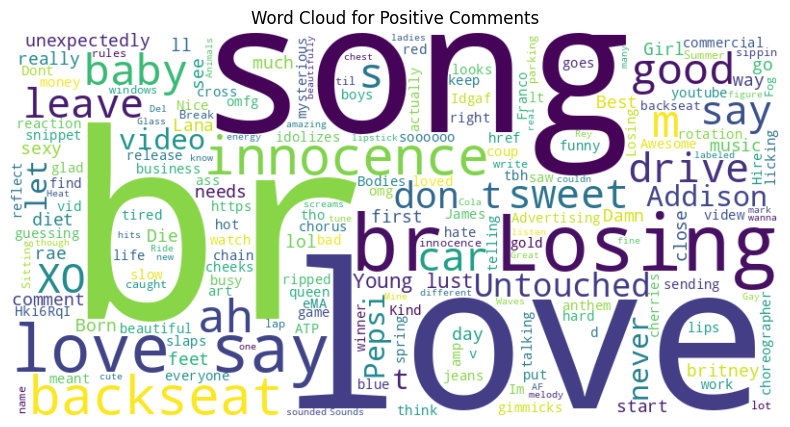

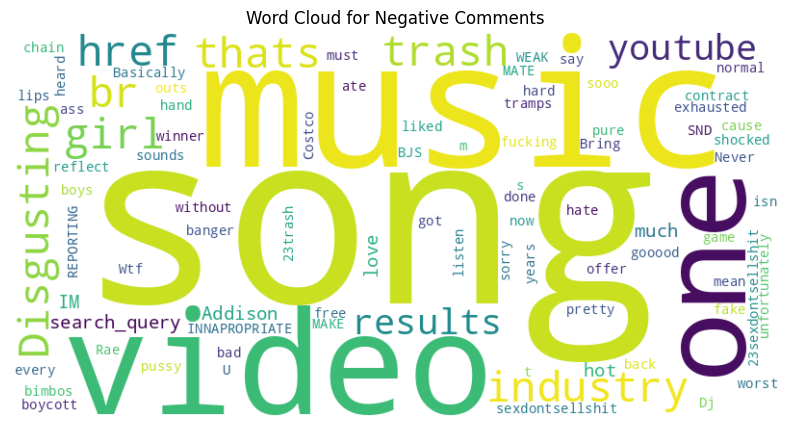

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine positive comments into a single string
positive_text = ' '.join(df[df['sentiment'] == 'positive']['text'].tolist())

# Create and generate a word cloud image for positive comments
positive_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(positive_text)

# Display the generated image for positive comments
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Comments")
plt.show()

# Combine negative comments into a single string
negative_text = ' '.join(df[df['sentiment'] == 'negative']['text'].tolist())

# Create and generate a word cloud image for negative comments
negative_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(negative_text)

# Display the generated image for negative comments
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Comments")
plt.show()

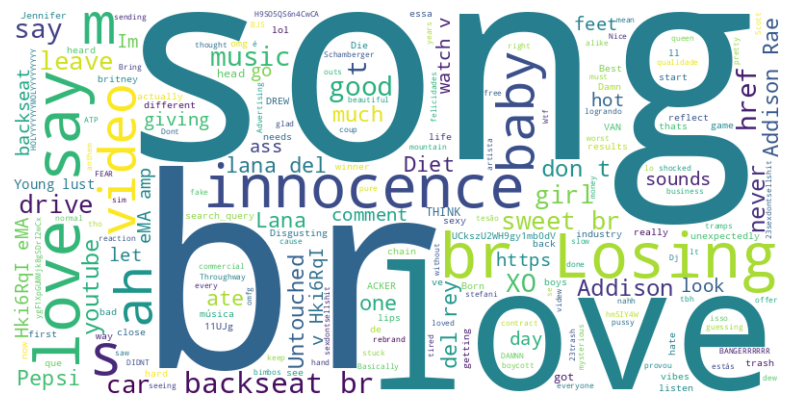

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all comments into a single string
text = ' '.join(df['text'].tolist())

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

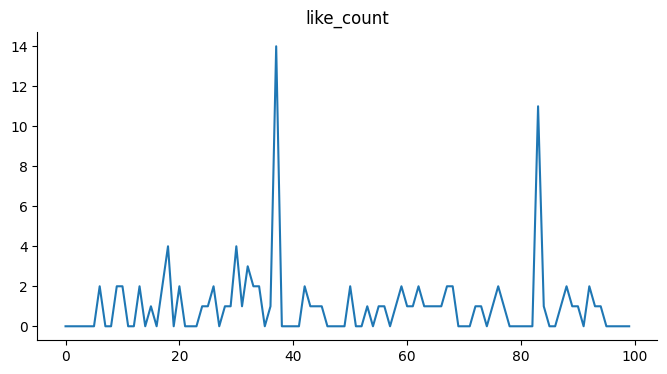

In [ ]:
# @title like_count

from matplotlib import pyplot as plt
df['like_count'].plot(kind='line', figsize=(8, 4), title='like_count')
plt.gca().spines[['top', 'right']].set_visible(False)

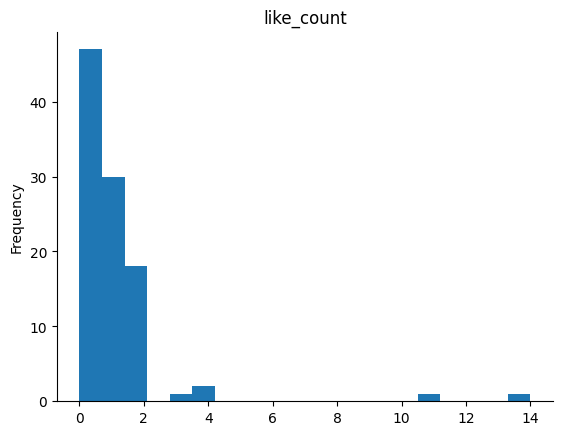

In [ ]:
# @title like_count

from matplotlib import pyplot as plt
df['like_count'].plot(kind='hist', bins=20, title='like_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.head()